#### Analyze and assess financial reports for Apple  Stocks

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import yfinance as yf
from matplotlib import dates

In [4]:
raw = yf.download('SPY AAPL',start='2010-01-01',end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [5]:
raw.head()

Adj Close                Close                  High              \
                AAPL        SPY      AAPL         SPY      AAPL         SPY   
Date                                                                          
2010-01-04  6.496294  87.791779  7.643214  113.330002  7.660714  113.389999   
2010-01-05  6.507525  88.024147  7.656429  113.629997  7.699643  113.680000   
2010-01-06  6.404015  88.086166  7.534643  113.709999  7.686786  113.989998   
2010-01-07  6.392178  88.457993  7.520714  114.190002  7.571429  114.330002   
2010-01-08  6.434672  88.752365  7.570714  114.570000  7.571429  114.620003   

                 Low                  Open                 Volume             
                AAPL         SPY      AAPL         SPY       AAPL        SPY  
Date                                                                          
2010-01-04  7.585000  111.510002  7.622500  112.370003  493729600  118944600  
2010-01-05  7.616071  112.849998  7.664286  113.260002  601904800  111579900  
2010-01-06  7.526786  113.430000  7.656429  113.519997  552160000  116074400  
2010-01-07  7.466071  113.180000  7.562500  113.500000  477131200  131091100  
2010-01-08  7.466429  113.660004  7.510714  113.889999  447610800  126402800

In [6]:
list(raw.columns)

[('Adj Close', 'AAPL'),
 ('Adj Close', 'SPY'),
 ('Close', 'AAPL'),
 ('Close', 'SPY'),
 ('High', 'AAPL'),
 ('High', 'SPY'),
 ('Low', 'AAPL'),
 ('Low', 'SPY'),
 ('Open', 'AAPL'),
 ('Open', 'SPY'),
 ('Volume', 'AAPL'),
 ('Volume', 'SPY')]

In [7]:
raw.shape

(2515, 12)

In [9]:
##To check for official docs of a function use question mark at the end of fn 
##raw.pipe?

In [29]:
def fix_cols(df):
    columns=df.columns
    outer=[col[0] for col in columns]
    df.columns = outer
    return df

# def tweak_data():
#     return (raw.iloc[:,::2].pipe(fix_cols))

# tweak_data()

data = (raw.iloc[:,::2].pipe(fix_cols))

<Axes: xlabel='Date'>

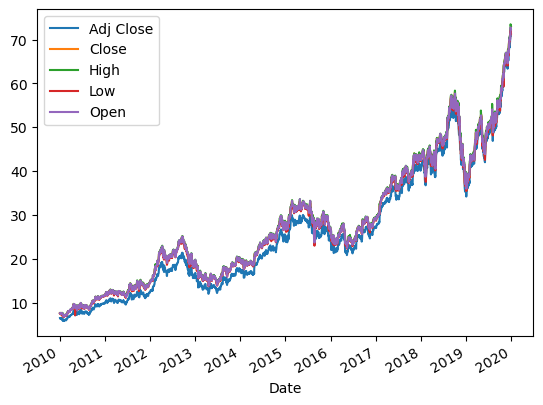

In [31]:
raw.iloc[:,:-2:2].pipe(fix_cols).plot()

<Axes: xlabel='Date'>

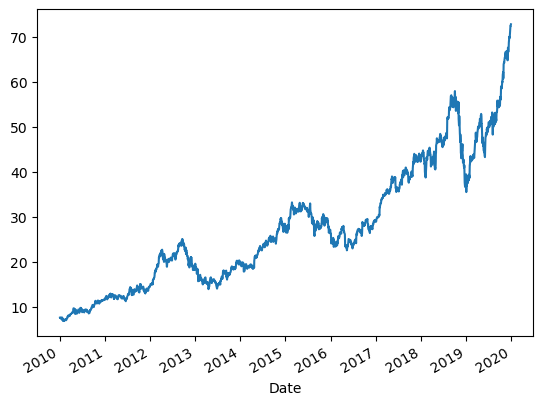

In [32]:
(raw.iloc[:,::2].pipe(fix_cols).Close.plot())

<Axes: xlabel='Date'>

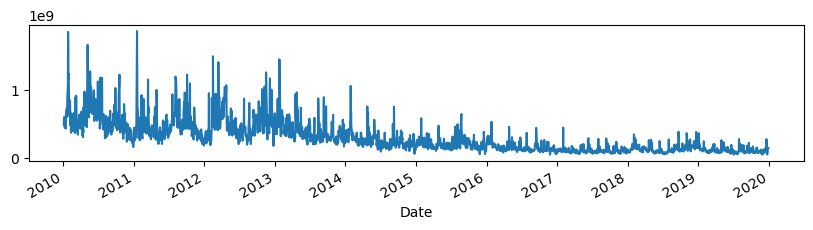

In [34]:
(raw.iloc[:,::2].pipe(fix_cols).Volume.plot(figsize=(10,2)))

In [35]:
raw.iloc[:,::2].pipe(fix_cols).Close

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [38]:
##resample helps us to take our data from one granularity to another 
#granularity i.e it helps us to aggregate based on Monthly(M) or Quarterly(Q)
##basis
raw.iloc[:,::2]\
.pipe(fix_cols)\
.resample('M')\
.Close\
.mean() ## resample should be ended with mean/median/mode

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

<Axes: xlabel='Date'>

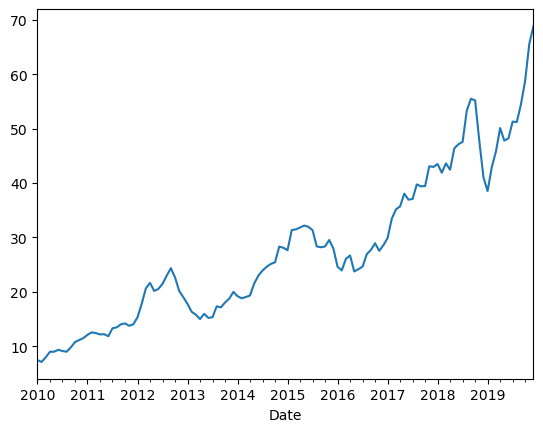

In [39]:
raw.iloc[:,::2]\
.pipe(fix_cols)\
.resample('M')\
.Close\
.mean()\
.plot()

#### Candlestick Plot

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


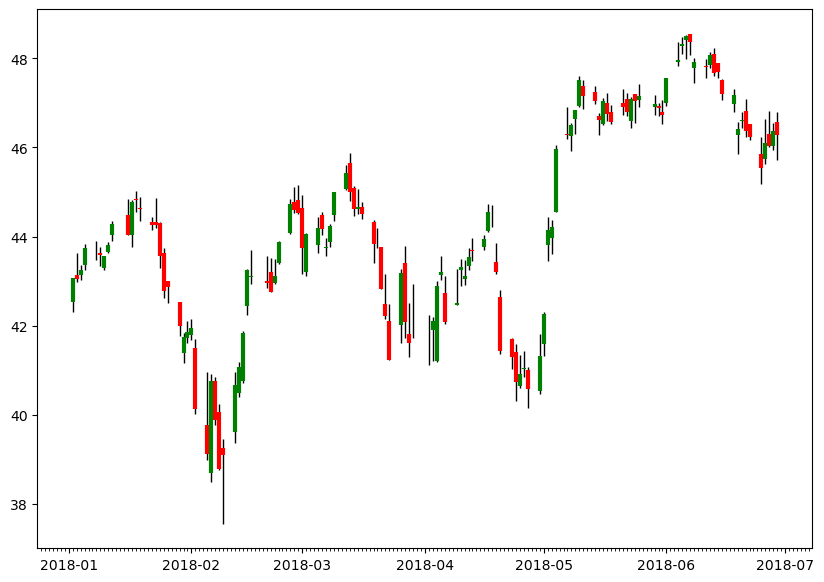

In [48]:
fig, ax = plt.subplots(figsize=(10,7))

def plot_candle(df,ax):
    #wick
    ax.vlines(x=df.index , ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    #red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green = increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_minor_locator(dates.DayLocator())
    
    return df

raw\
.iloc[:,::2]\
.pipe(fix_cols)\
.resample('d')\
.agg({'Open':'first','High':'max','Low':'min','Close':'last'})\
.loc['jan 2018':'jun 2018']\
.pipe(plot_candle,ax)


### Challenge
Plot the Candles for the Time Period of Sep 2019 to Dec 2019 

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-26,71.205002,72.495003,71.175003,72.477501
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN


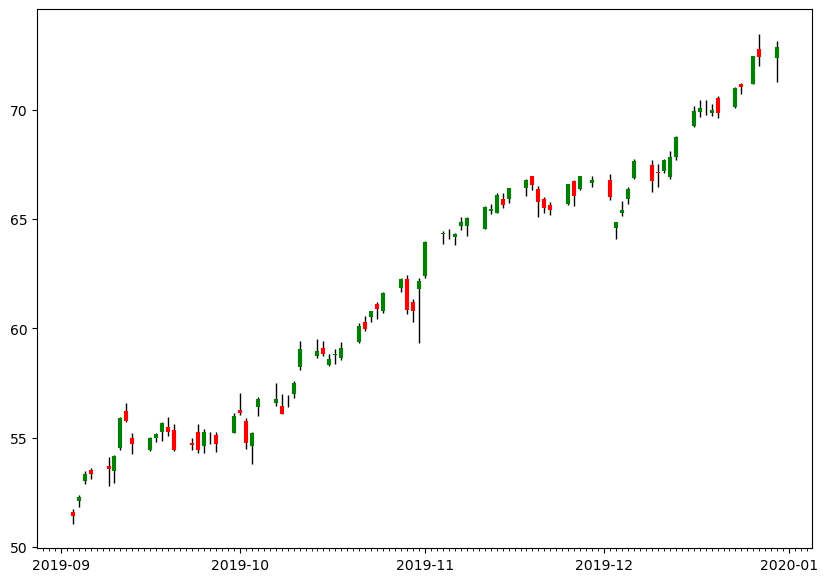

In [54]:
fig,axis = plt.subplots(figsize=(10,7))

raw\
.iloc[:,::2]\
.pipe(fix_cols)\
.resample('d')\
.agg({'Open':'first','High':'max','Low':'min','Close':'last'})\
.loc['sep 2019':'dec 2019']\
.pipe(plot_candle,axis)

In [55]:
aapl = raw.iloc[:,::2].pipe(fix_cols)

In [58]:
#returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001848,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000950,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


<Axes: xlabel='Date'>

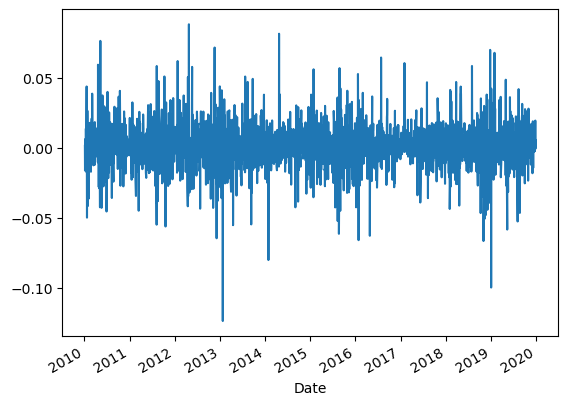

In [59]:
aapl.pct_change().Close.plot()

<Axes: >

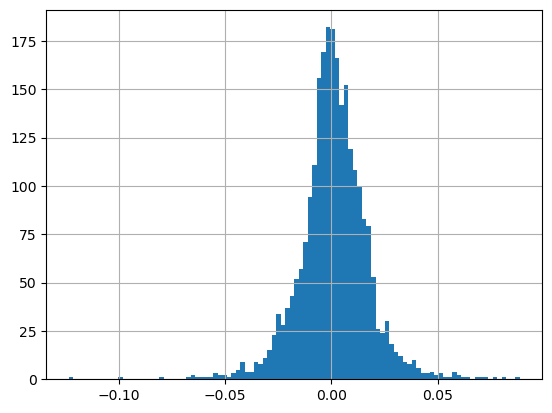

In [62]:
aapl.pct_change().Close.hist(bins=100)

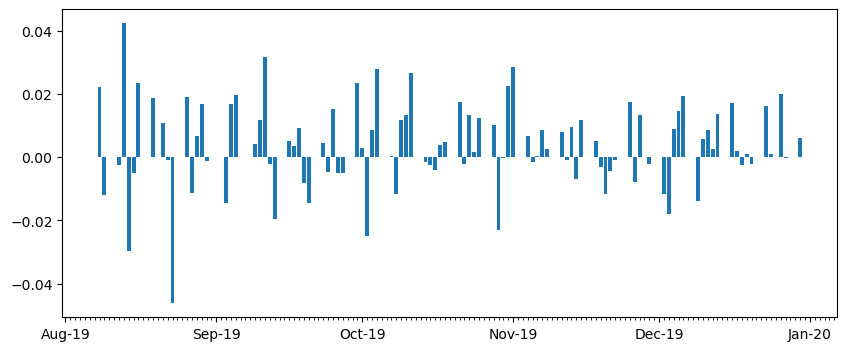

In [64]:
def my_bar(ser, ax):
    ax.bar(ser.index,ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4))
_ = aapl.pct_change().Close.iloc[-100:].pipe(my_bar,ax)

#### Cumulative Returns

<Axes: xlabel='Date'>

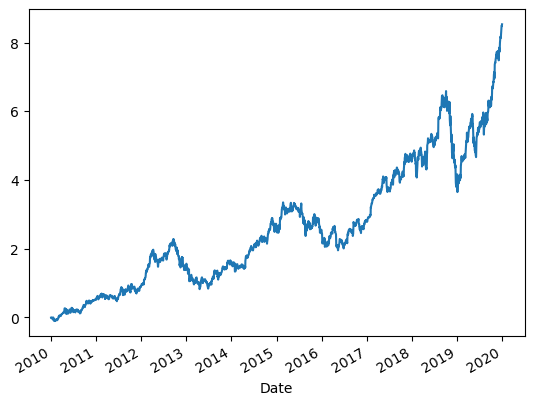

In [70]:
aapl\
.Close\
.sub(aapl.Close[0])\
.div(aapl.Close[0])\
.plot()

<Axes: xlabel='Date'>

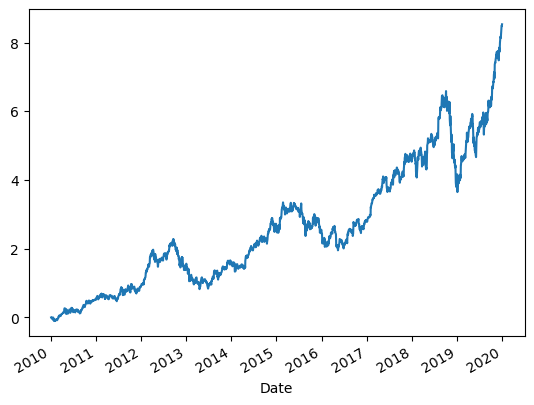

In [71]:
#alternate way
aapl.Close.pct_change().add(1).cumprod().sub(1).plot()